## Outline
* Здесь приводится пример задачи ML, в которой наглядно продемонстирована необходимость использования двухшаговой кроссвалидации для оценки (assessment) точности предсказания алгоритма ML

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline

## Данные

In [2]:
# Генерим случайный бинарный вектор длинф L, генерим d признаков из нормального стандартного распределения N(0,1)
from random import SystemRandom, normalvariate

L = 50
d = 1000

gen_train = pd.DataFrame.from_records([
        [ SystemRandom().randint(0,1)]+ [normalvariate(0, 1) for j in range(d)] 
        for i in range(L)
    ], columns = ['Label']+ ['F'+str(j)  for j in range(d)])

In [3]:
gen_train.head()

,Label,F0,F1,F2,F3,F4,F5,F6,F7,F8,...,F990,F991,F992,F993,F994,F995,F996,F997,F998,F999
0,1,-0.511515,2.119177,-0.748062,0.729684,1.332743,0.986827,0.890493,-0.456214,0.839009,...,0.387067,0.522610,-0.002765,0.015575,-0.172271,-0.990329,1.199418,0.175333,-0.432216,0.764423
1,0,0.054382,-1.107001,-0.893974,0.847292,-0.215251,-0.723793,1.280805,0.939361,-0.529346,...,-0.316993,0.042734,1.160178,-0.119499,-1.649064,-1.834241,0.440387,-0.053930,-1.220722,-1.563664
2,1,-1.116156,1.028782,-0.626019,1.894904,-0.176052,-0.257307,-1.299473,-0.535440,-0.350891,...,0.560088,0.118678,-1.595316,0.773475,-1.720071,-1.721826,-1.628735,-1.078379,0.575825,0.746430
3,0,-0.585433,-1.078356,0.787877,-2.058594,-0.069635,-0.214437,0.558494,1.270771,0.588577,...,-1.134296,1.479579,1.908693,0.847967,1.031707,0.169772,-1.154398,-1.191920,0.253616,0.288210
4,1,1.896744,2.017348,-0.953660,-0.467967,-0.962713,1.433546,-0.119200,-0.054877,0.813040,...,0.006671,1.447931,-1.836601,0.522973,0.058050,0.733778,-0.844484,2.333115,-0.062266,-0.740313


In [4]:
gen_train.groupby(['Label'])['Label'].count()

Label
0    27
1    23
Name: Label, dtype: int64

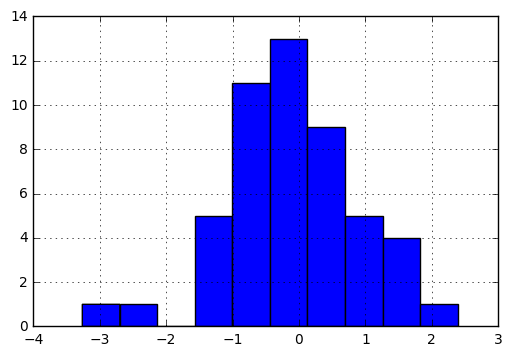

In [5]:
gen_train['F13'].hist()

** Вопрос**
 - Какая максмальная точность классификации может быть достигнута на данном дата-сете?

## Метод обучения: Decision Stump\1-NN + q-Fold

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.cross_validation import StratifiedKFold
from sklearn.metrics import accuracy_score

def qFold_accuracy(x,y, estimator, cv_strategy):
    score = 0
    for train_indices, test_indices in cv_strategy:
        estimator.fit(x[train_indices], y[train_indices])
        score += estimator.score(x[test_indices], y[test_indices])
    return score/len(cv_strategy)

In [7]:
# Проводим эксперимент по нестройке классификатора, опирающегося на 1 признак
max_score = 0
f=0 
cv_k = 10
# kf = KFold(L,cv_k)                                 
kf = StratifiedKFold(np.asarray(gen_train['Label']), cv_k, shuffle = True) 
for j in range(1,d+1):       # номер признака
    #    print '\n', '\n' #, kf_1

    scrrr  = qFold_accuracy(np.asarray(gen_train[[gen_train.columns[j]]]),np.asarray(gen_train[['Label']]).ravel(),KNeighborsClassifier(n_neighbors=1), kf)
#    print i,"-th feature = ",scrrr
    if(scrrr > max_score):
        max_score = scrrr
        f = j-1
print('q-Fold score:', max_score)
print('The best feature No:', f)

('q-Fold score:', 0.80333333333333334)
('The best feature No:', 272)


## Генерим Test Set для оценки точности алгоритма

In [8]:
# estimation set
gen_test = pd.DataFrame.from_records([
        [ SystemRandom().randint(0,1)]+ [normalvariate(0, 1) for j in range(1)] 
        for i in range(50)
    ], columns = ['Label']+ ['F'+str(j)  for j in range(1)])

## Оцениваем точность финального алгоритма на Estimation Set

In [9]:
# True score on Test Set
clf = DecisionTreeClassifier()
clf.fit(np.asarray(gen_train[['F'+str(f)]]), np.asarray(gen_train[['Label']]))
print(accuracy_score(clf.predict(np.asarray(gen_test[['F0']])), np.asarray(gen_test[['Label']])))

0.44
